<a href="https://colab.research.google.com/github/Lexian-6/Sentiment-Analysis-towards-COVID-19-on-Twitter/blob/main/COVIDSenti_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title: Sentiment Analysis towards COVID-19 on Twitter**
## ***Area of Research: Natural Language Processing (NLP)***


## Group name: Pluviophile
### Submitted on: (date here when we submit)

| **Name**           | **Email**                          | **Student Id** |
|--------------------|------------------------------------|----------------|
| Junle Zhou         | junle.zhou@student.unsw.edu.au     | z5431301       |
| name               | email                              | ID             |
| name               | email                              | ID             |
| name               | email                              | ID             |
| name               | email                              | ID             |


# **Table of Contents**
1. [Introduction, Motivation and Problem Statement](#introduction)
2. [Goal of Our Project](#goal)
3. [Data Source: COVIDSenti Dataset](#data-source)
4. [Exploratory Data Analysis](#data-analysis)
5. (or maybe 5, 6, 7 since we have different models) [Sentiment Analysis Models](#models)
6. [Experimental Setup & Results](#results)
7. [Model Analysis & Interpretation](#analysis--interpretation)
8. [Fine-Tuning and Hyperparameter Tuning](#fine-tuning)
9. [Exploring Different Datasets and Models (if we have time)](#different-datasets)
10. [Conclusion & Future Work](#conclusion)

<a name="introduction"></a>
## 1. Introduction, Motivation and Problem Statement

😷The COVID-19 pandemic has had an unprecedented impact on global health, the economy, and society as a whole. As governments worldwide implemented measures to control the spread of the virus, such as lockdowns and social distancing, people turned to social media platforms to express their opinions, concerns, and experiences during this crisis.

📘Twitter, in particular, has become a crucial platform for public discourse during the pandemic. With millions of tweets posted daily, Twitter provides a vast amount of user-generated content that can be analyzed to gain insights into public sentiment. Understanding public sentiment is essential for policymakers, public health officials, and researchers to make informed decisions and develop effective strategies to address the challenges posed by the pandemic.

🪧Sentiment analysis, a subfield of natural language processing, offers a powerful tool to automatically classify the sentiment expressed in text data. By applying sentiment analysis techniques to COVID-19 related tweets, we can gain a deeper understanding of public opinion trends, identify prevalent concerns, and track sentiment shifts over time.

In this project, we will be using the COVIDSenti dataset, which contains tweets related to the COVID-19 pandemic collected from March to April 2020. We will preprocess the text data, perform exploratory analysis, and develop sentiment classification models using deep learning techniques. By comparing the performance of different models and analyzing their behavior, we aim to contribute to a better understanding of public sentiment during the COVID-19 pandemic and showcase the potential of sentiment analysis in crisis situations.

<a name="goal"></a>
## 2. 🚩Goal of Our Project

The main goal of this project is to develop and compare deep learning models for sentiment analysis of COVID-19 related tweets. By achieving this goal, we aim to contribute to a better understanding of public sentiment during the pandemic and demonstrate the effectiveness of sentiment analysis techniques in crisis situations.

To achieve this goal, we have set the following objectives:

1. Data Collection and Preprocessing:
   - Collect a large dataset of COVID-19 related tweets using the Twitter API
   - Preprocess the text data by cleaning, tokenizing, and normalizing the tweets
   - Explore and visualize the dataset to gain insights into its characteristics and distribution

2. Sentiment Analysis Model Development:
   - Implement and train an LSTM model for sentiment classification
   - Fine-tune a pre-trained BERT model for sentiment classification
   - Experiment with different hyperparameters and architectures to optimize model performance

3. Model Evaluation and Comparison:
   - Evaluate the performance of the LSTM and BERT models using appropriate metrics (accuracy, precision, recall, F1-score)
   - Compare the results of the two models and analyze their strengths and weaknesses
   - Interpret the models' behavior and identify important features for sentiment classification

4. Insights and Future Directions:
   - Discuss the implications of our findings for understanding public sentiment during the COVID-19 pandemic
   - Identify limitations of our approach and suggest potential improvements
   - Propose future research directions, such as incorporating more advanced models or expanding the analysis to other datasets

By completing these objectives, we expect to develop accurate and interpretable sentiment analysis models that can be used to track public sentiment trends during the COVID-19 pandemic. Our project will contribute to the growing body of research on sentiment analysis in crisis situations and provide insights that can inform decision-making processes related to the pandemic.

<a name="data-source"></a>
## 3. Data Source: COVIDSenti Dataset

For this project, we used the COVIDSenti dataset, which contains tweets related to the COVID-19 pandemic. The dataset was collected by the authors of the paper "COVIDSenti: A Large-Scale Benchmark Twitter Data Set for COVID-19 Sentiment Analysis" (Naseem et al., 2021) and is publicly available on GitHub.

### 3.1 Data Collection

The COVIDSenti dataset was collected using the Twitter API from March 2020 to April 2020, during the early stages of the COVID-19 pandemic. The authors used a set of COVID-19 related keywords and hashtags to filter the tweets, such as "coronavirus", "covid19", "pandemic", "quarantine", and "social distancing".



### 3.2 Dataset Size and Structure

The COVIDSenti dataset consists of 90,000 tweets, evenly distributed across three sentiment classes: positive, negative, and neutral. The dataset is further divided into three subsets: COVIDSenti-A, COVIDSenti-B, and COVIDSenti-C, each containing 30,000 tweets.

The CSV files contain the following columns:
- `tweet`: The text content of the tweet
- `label`: The sentiment label assigned to the tweet (positive, negative, or neutral)

In [35]:
# @title 📊Load and Preview COVIDSenti Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti.csv'
url_A = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-A.csv'
url_B = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-B.csv'
url_C = 'https://raw.githubusercontent.com/usmaann/COVIDSenti/main/COVIDSenti-C.csv'

df = pd.read_csv(url)
df_A = pd.read_csv(url_A)
df_B = pd.read_csv(url_B)
df_C = pd.read_csv(url_C)

print(df.info())
print(df['label'].value_counts())
print(df_A.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   90000 non-null  object
 1   label   90000 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB
None
label
neu    67385
neg    16335
pos     6280
Name: count, dtype: int64
                                               tweet label
0  Coronavirus | Human Coronavirus Types | CDC ht...   neu
1  @shehryar_taseer That‚Äôs üíØ true , \nCorona...   neu
2  TLDR: Not SARS, possibly new coronavirus. Diff...   neg
3  Disease outbreak news from the WHO: Middle Eas...   neu
4  China - Media: WSJ says sources tell them myst...   neu



### 3.3 Data Preprocessing

To prepare the dataset for our sentiment analysis models, we performed the following preprocessing steps: (*not sure yet, could be modified later haha, just list 5 examples of possible preprocessing*)

1. Removing URLs, mentions, and special characters from the tweet text
2. Converting the text to lowercase
3. Tokenizing the text into individual words
4. Removing stop words (common words like "the", "and", "in", etc.)
5. Lemmatizing the words to their base for
6. (Maybe translating emoji?)

The preprocessed dataset is then split into training, validation, and testing sets for model development and evaluation.

### 3.4 Data Availability

The COVIDSenti dataset is publicly available on GitHub, along with the code and resources used in the original paper. This allows for easy reproducibility and comparison of sentiment analysis models trained on this dataset.

<a name="data-analysis"></a>
## 4. Exploratory Data Analysis
- Visualize the distribution of sentiment labels in the dataset
- Analyze the length distribution of tweets
- Identify the most common words and bigrams in each sentiment class
- Visualize using word cloud
- And more (to be added)

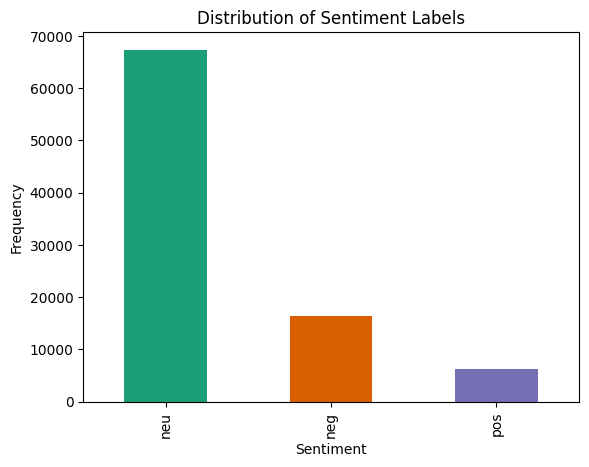

In [3]:
# A simple example for visualizing labels.
df['label'].value_counts().plot(kind='bar', color=sns.color_palette('Dark2'))
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

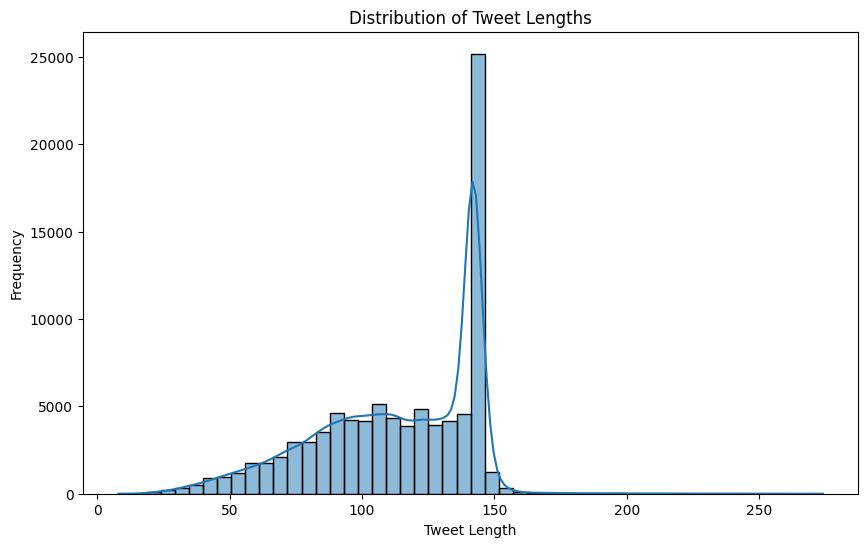

In [4]:
df['tweet_length'] = df['tweet'].apply(lambda x: len(str(x)))

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tweet_length', bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['tweet'], 20)
df_common_words = pd.DataFrame(common_words, columns=['word', 'freq'])

print("Most common words:")
print(df_common_words)

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigrams = get_top_n_bigram(df['tweet'], 20)
df_common_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'freq'])

print("Most common bigrams:")
print(df_common_bigrams)

Most common words:
           word   freq
0   coronavirus  79934
1            co  78549
2         https  78339
3           the  52435
4            to  32136
5            of  22778
6            in  21922
7            is  17197
8           and  14614
9           for  11953
10        virus  11532
11       corona  10139
12           on   9894
13           it   8571
14        china   7821
15          you   7575
16         from   7294
17           as   7057
18         with   7029
19         that   6947
Most common bigrams:
                  bigram   freq
0               https co  78332
1        the coronavirus  13907
2           corona virus   9500
3      coronavirus https   7739
4         of coronavirus   5163
5                 of the   4193
6         coronavirus is   3705
7               covid 19   3567
8   coronavirus outbreak   3517
9             the corona   3381
10                in the   3018
11       for coronavirus   2643
12        coronavirus in   2326
13        to coronavirus   21

In [6]:
for sentiment in ['pos', 'neg', 'neu']:
    print(f"\nMost common words in {sentiment} tweets:")
    common_words = get_top_n_words(df[df['label'] == sentiment]['tweet'], 20)
    df_common_words = pd.DataFrame(common_words, columns=['word', 'freq'])
    print(df_common_words)

    print(f"\nMost common bigrams in {sentiment} tweets:")
    common_bigrams = get_top_n_bigram(df[df['label'] == sentiment]['tweet'], 20)
    df_common_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'freq'])
    print(df_common_bigrams)


Most common words in pos tweets:
           word  freq
0   coronavirus  5441
1            co  5193
2         https  5177
3           the  4208
4            to  2390
5            in  1479
6            of  1469
7            is  1359
8          more  1312
9           and  1227
10           on   925
11        virus   924
12          for   910
13       corona   852
14          you   737
15           it   732
16          are   650
17         from   645
18        china   587
19           be   582

Most common bigrams in pos tweets:
                  bigram  freq
0               https co  5177
1        the coronavirus  1127
2           corona virus   790
3      coronavirus https   454
4         of coronavirus   315
5                 of the   311
6             the corona   299
7         coronavirus is   287
8               covid 19   269
9             the latest   247
10             more than   234
11                in the   224
12              in china   215
13  coronavirus outbreak   211
14 

In [19]:
from wordcloud import WordCloud

def generate_bigram_wordcloud(text):
    # Create a CountVectorizer object with bigrams
    cv = CountVectorizer(ngram_range=(2, 2))

    # Fit and transform the text
    bigram_counts = cv.fit_transform(text)

    # Convert the bigram counts to a dictionary
    bigram_dict = dict(zip(cv.get_feature_names_out(), bigram_counts.sum(axis=0).tolist()[0]))

    # Create a word cloud object
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis')

    # Generate the word cloud
    wc.generate_from_frequencies(bigram_dict)

    # Display the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.show()



Bigram Word Cloud for all Tweets:


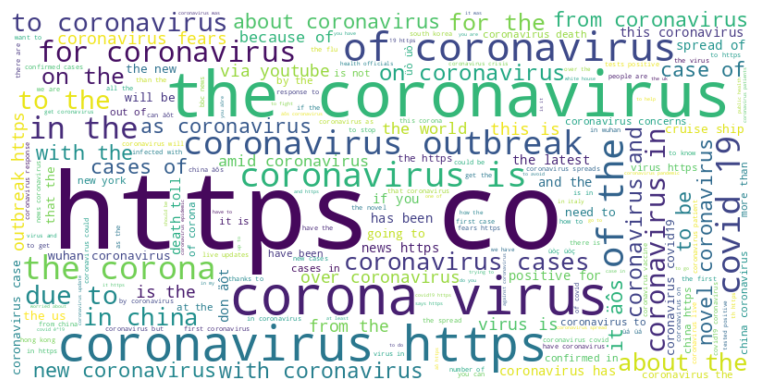


Bigram Word Cloud for Pos Tweets:


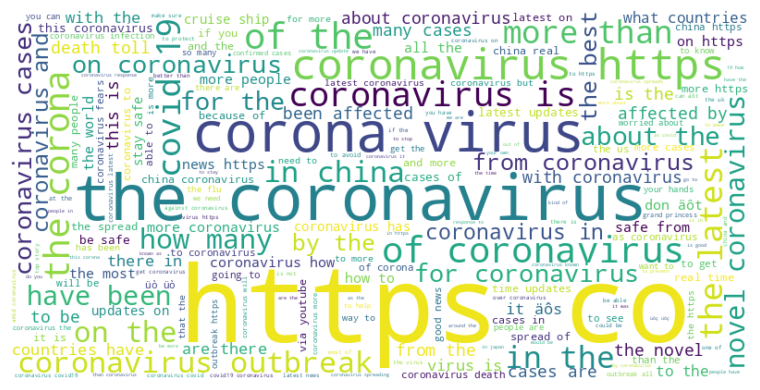


Bigram Word Cloud for Neg Tweets:


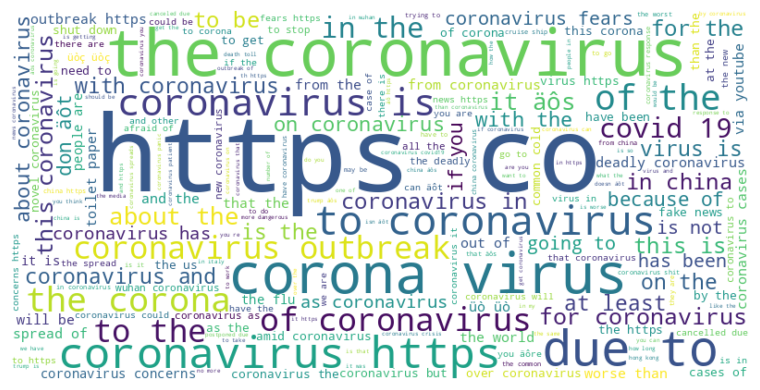


Bigram Word Cloud for Neu Tweets:


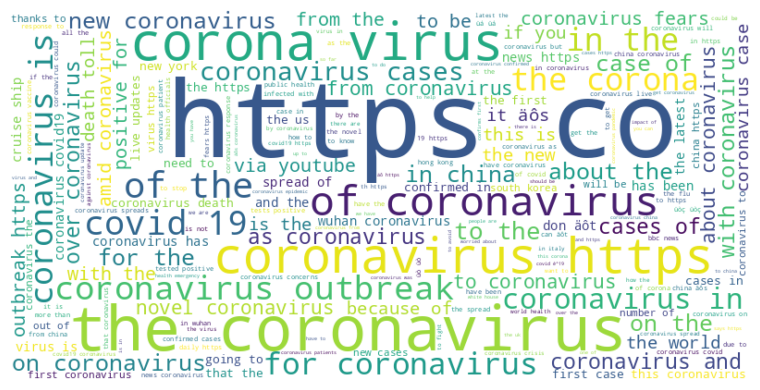

In [20]:
# Generate bigram word cloud for the entire dataset
print(f"\nBigram Word Cloud for all Tweets:")
generate_bigram_wordcloud(df['tweet'])

# Generate bigram word clouds for each sentiment class
for sentiment in ['pos', 'neg', 'neu']:
    print(f"\nBigram Word Cloud for {sentiment.capitalize()} Tweets:")
    generate_bigram_wordcloud(df[df['label'] == sentiment]['tweet'])

<a name="models"></a>
## 5. Sentiment Analysis Models
- Introduce the LSTM and BERT models for sentiment analysis
- Discuss the architecture and key features of each model
- Explain the process of tokenization, embedding, and model training
- Describe any modifications or hyperparameter tuning performed on the models

<a name="results"></a>
## 6. Experimental Setup & Results
- Explain the train-validation-test split of the dataset
- Discuss the choice of evaluation metrics (accuracy, precision, recall, F1-score)
- Present the results of the LSTM and BERT models on the test set
- Compare the performance of the models and discuss their strengths and weaknesses
- Visualize the learning curves and confusion matrices for each model

<a name="analysis--interpretation"></a>
## 7. Model Analysis & Interpretation
- Analyze the attention weights of the BERT model to identify important words and phrases for each sentiment class
- Visualize the learned word embeddings of the LSTM model and try to explore semantic relationships *(I'm not very confident, to be honest. I struggled a bit with analyzing the inner workings of the LSTM model in Assignment 1)*
- Maybe use techniques like LIME or SHapley Additive exPlanations (SHAP) to interpret the model predictions
- Discuss interesting or surprising findings from the model analysis

<a name="fine-tuning"></a>
## 8. Fine-Tuning and Hyperparameter Tuning
- Experiment with different hyperparameters for the LSTM and BERT models (learning rate, batch size, number of layers, etc.)
- Perform fine-tuning of the BERT model on the COVIDSenti dataset
- Discuss the impact of hyperparameter tuning and fine-tuning on model performance

<a name="different-datasets"></a>
## 9. Exploring Different Datasets and Models (if we have time)
- Apply the sentiment analysis models to other COVID-19 related datasets
- Experiment with different pre-trained word embeddings (GloVe, FastText, etc.)
- Explore other deep learning architectures for sentiment analysis (CNN, BiLSTM, AlBERT, XLNet etc.)
- Compare the performance of the models across different datasets and architectures

<a name="conclusion"></a>
## 10. Conclusion & Future Work
- Summarize the main findings and contributions of the project
- Discuss the limitations and potential improvements of the current approach
- Suggest future research directions. I don't know, maybe explore something such as incorporating multimodal data (images, videos) or exploring cross-lingual sentiment analysis
- Reflect on the broader implications of the project for understanding public sentiment during crises